In [5]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install numpy


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 2.6 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl (43.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
df = pd.read_csv("Dataset.csv")

In [13]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


DATA CLEANING

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df.shape

(205052, 6)

In [17]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [18]:
# trailing white space observed
df.columns = df.columns.str.strip()


In [19]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [20]:
df.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [21]:
df['product_name']

0         Candes 12 L Room/Personal Air Cooler??????(Whi...
1         Candes 12 L Room/Personal Air Cooler??????(Whi...
2         Candes 12 L Room/Personal Air Cooler??????(Whi...
3         Candes 12 L Room/Personal Air Cooler??????(Whi...
4         Candes 12 L Room/Personal Air Cooler??????(Whi...
                                ...                        
205047    cello Pack of 18 Opalware Cello Dazzle Lush Fi...
205048    cello Pack of 18 Opalware Cello Dazzle Lush Fi...
205049    cello Pack of 18 Opalware Cello Dazzle Lush Fi...
205050    cello Pack of 18 Opalware Cello Dazzle Lush Fi...
205051    cello Pack of 18 Opalware Cello Dazzle Lush Fi...
Name: product_name, Length: 205052, dtype: object

In [22]:
df["product_name"].head()

0    Candes 12 L Room/Personal Air Cooler??????(Whi...
1    Candes 12 L Room/Personal Air Cooler??????(Whi...
2    Candes 12 L Room/Personal Air Cooler??????(Whi...
3    Candes 12 L Room/Personal Air Cooler??????(Whi...
4    Candes 12 L Room/Personal Air Cooler??????(Whi...
Name: product_name, dtype: object

In [23]:
df.nunique()

product_name       958
product_price      525
Rate                 8
Review            1324
Summary          92923
Sentiment            3
dtype: int64

In [24]:
# Sorting rows by 'product_id'
df = df.sort_values(
    by='product_name',
    ascending=True
).reset_index(drop=True)

In [25]:
missing_value=df.isnull().sum() #check missing value

In [26]:
df = df.dropna() # remove rows with misisng values
df = df.dropna(axis=1) # remove columns with misisng values

In [27]:

df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,good quality design awesome thanks to flipkart...,positive
1,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,very nice n super product the quality is also ...,positive
2,1170BLBR Unique New Day Date Analog Watch F...,299,1,not specified,date not working correctly,negative
3,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,nice,positive
4,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,super quality super product i loved it i gave ...,positive
...,...,...,...,...,...,...
205047,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,5,must buy!,good,positive
205048,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,5,mind-blowing purchase,cycle product is very good but attached in cyc...,positive
205049,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,4,nice product,valuable product,positive
205050,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,3,nice,finishing is not so good breaking system is us...,positive


In [28]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()


25912


In [29]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,good quality design awesome thanks to flipkart...,positive
1,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,very nice n super product the quality is also ...,positive
2,1170BLBR Unique New Day Date Analog Watch F...,299,1,not specified,date not working correctly,negative
3,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,nice,positive
4,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,super quality super product i loved it i gave ...,positive
...,...,...,...,...,...,...
205046,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,3,does the job,back wheel bearing problem,neutral
205048,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,5,mind-blowing purchase,cycle product is very good but attached in cyc...,positive
205049,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,4,nice product,valuable product,positive
205050,"vesco Kiddo 14"" Cycle for Kids Bicycles age 3 ...",3295,3,nice,finishing is not so good breaking system is us...,positive


In [30]:
df=df[~df["Rate"].isin(["-", "not supported"])]

In [31]:
plug_in_hybrid_data = df[df['Rate'] == 'Plug-In Hybrid']
plug_in_hybrid_data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment


In [32]:
df['product_name'].value_counts()

product_name
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)                                                               4362
Lakm?? Eyeconic Kajal Twin Pack??????????(Deep Black, 0.7 g)                                                                                                                              2805
Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)                                                                                                         2122
Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ®ÐÂ ÐÒ?ÐÓ®ÐÂ ( Built-in Stitches 9)                                                                                                    1743
Canon EOS 3000D DSLR Camera 1 Camera Body, 18 - 55 mm Lens????????(Black)                                                                                                                 1646
                                

In [33]:
df['product_price'].value_counts()

product_price
1299                                                    6859
218                                                     4168
449                                                     3704
1599                                                    3578
13999                                                   3029
                                                        ... 
244                                                        9
850                                                        9
Nova Plus Amaze NI 10 1100 W Dry IronGrey  Turquoise       1
Bajaj DX 2 LW Dry Iron                                     1
pigeon favourite electric kettle15 l silver black          1
Name: count, Length: 479, dtype: int64

In [34]:
df['Rate'].value_counts()

Rate
5                                                                    88726
4                                                                    30484
1                                                                    17475
3                                                                    12500
2                                                                     5279
Bajaj DX 2 L/W Dry Iron                                                  1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)        1
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)             1
Name: count, dtype: int64

In [35]:
df['Review'].value_counts()

Review
wonderful                                                      7623
not specified                                                  5714
great product                                                  4814
brilliant                                                      4807
awesome                                                        4794
                                                               ... 
for balanced sound                                                1
highly recommended.worth buying,high bass,long battery life       1
good buy. go for it.                                              1
very good at this price and battery bakcup awsm                   1
worth every penny... superb                                       1
Name: count, Length: 1324, dtype: int64

In [36]:
df['Summary'].value_counts()

Summary
good                                                                                                                                                                                                                                                                                                                                                         6784
nice                                                                                                                                                                                                                                                                                                                                                         4498
good product                                                                                                                                                                                                                                                                                

In [37]:
df['Sentiment'].value_counts()

Sentiment
positive    122808
negative     23353
neutral       8306
Name: count, dtype: int64

In [38]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,good quality design awesome thanks to flipkart...,positive
1,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,very nice n super product the quality is also ...,positive
2,1170BLBR Unique New Day Date Analog Watch F...,299,1,not specified,date not working correctly,negative
3,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,nice,positive
4,1170BLBR Unique New Day Date Analog Watch F...,299,5,not specified,super quality super product i loved it i gave ...,positive


In [39]:
df.size

926802

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154467 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154467 non-null  object
 1   product_price  154467 non-null  object
 2   Rate           154467 non-null  object
 3   Review         154467 non-null  object
 4   Summary        154467 non-null  object
 5   Sentiment      154467 non-null  object
dtypes: object(6)
memory usage: 8.2+ MB


In [41]:
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df = df.dropna(subset=['Rate'])
df['Review'] = df['Review'].fillna('')

In [42]:
dulicated_data = df.duplicated()
print(dulicated_data.sum())

0


EDA

In [43]:
df.describe

<bound method NDFrame.describe of                                              product_name  product_price  \
0       1170BLBR Unique New Day  Date Analog Watch   F...          299.0   
1       1170BLBR Unique New Day  Date Analog Watch   F...          299.0   
2       1170BLBR Unique New Day  Date Analog Watch   F...          299.0   
3       1170BLBR Unique New Day  Date Analog Watch   F...          299.0   
4       1170BLBR Unique New Day  Date Analog Watch   F...          299.0   
...                                                   ...            ...   
205046  vesco Kiddo 14" Cycle for Kids Bicycles age 3 ...         3295.0   
205048  vesco Kiddo 14" Cycle for Kids Bicycles age 3 ...         3295.0   
205049  vesco Kiddo 14" Cycle for Kids Bicycles age 3 ...         3295.0   
205050  vesco Kiddo 14" Cycle for Kids Bicycles age 3 ...         3295.0   
205051  vesco Kiddo 14" Cycle for Kids Bicycles age 3 ...         3295.0   

        Rate                 Review  \
0        5.0  

Univeriate analysis:
Analyzing the distibution of numerical features

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


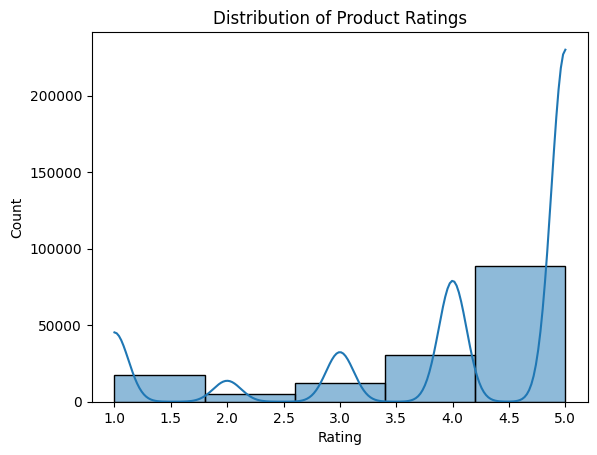

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Rating' or 'Rate' exists
print(df.columns)

# Use the correct column name
sns.histplot(df['Rate'], bins=5, kde=True)  # Change 'Rate' to 'Rating' if needed
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Analysis of the Graph: Distribution of Product Ratings
1. General Shape & Trends:
The x-axis ("Rating") represents customer ratings, ranging from 1 to 5.
The y-axis ("Count") shows the number of reviews corresponding to each rating.
The bars (histogram) show the count of ratings, while the blue KDE (Kernel Density Estimate) curve smooths out the distribution.
2. Observations from the Graph:
Peak at Rating 5:
The highest number of reviews are for 5-star ratings, meaning a large portion of customers are highly satisfied.
This suggests that many products are perceived as high-quality.
Smaller Peaks at Ratings 1, 3, and 4:
There are noticeable counts for 1-star, 3-star, and 4-star ratings, though much lower than 5-star ratings.
Some customers had a poor experience (1-star), while others were neutral (3-star) or satisfied but not fully impressed (4-star).
Fluctuating KDE Curve:
The KDE curve is wavy, showing significant variation in rating distribution.
This suggests that customer opinions are not uniform—some strongly like the products (5 stars), while others strongly dislike them (1 star).
Lower 2-Star Ratings:
The dip at 2-star ratings suggests that fewer customers give a moderate negative rating.
People may either love the product (5 stars) or strongly dislike it (1 star), skipping middle-ground ratings.
3. Possible Interpretations:
Positive Product Perception: Since 5-star ratings dominate, the majority of customers are satisfied.
Polarized Reviews: The presence of both 1-star and 5-star peaks suggests a mixed reaction, possibly due to product inconsistency.
Opportunity for Improvement: The presence of lower ratings (1-star, 3-star) indicates areas for product or service enhancement.

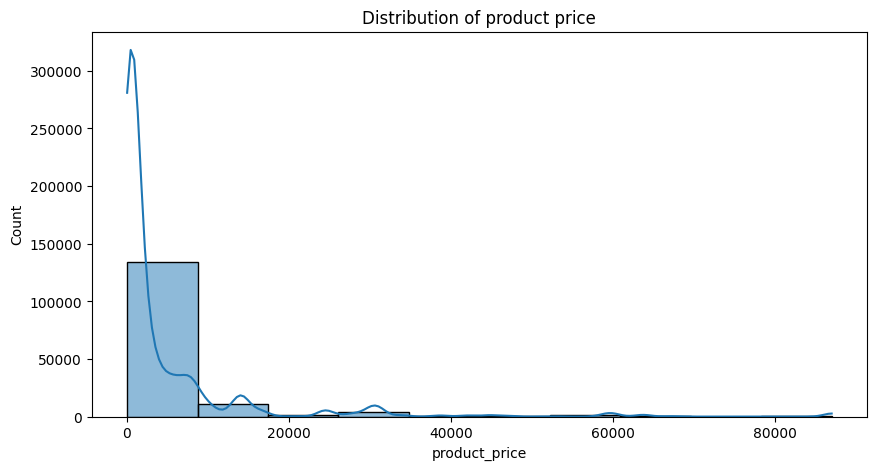

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df['product_price'], bins=10, kde=True)
plt.title("Distribution of product price")
plt.show()


Analysis of the Graph: Distribution of Product Prices
1. General Shape & Trends:
X-axis ("product_price") represents the price of products.
Y-axis ("Count") represents the number of products available at each price range.
The bars (histogram) show the count of products within each price range.
The blue KDE (Kernel Density Estimate) curve provides a smoothed-out representation of the price distribution.
2. Observations from the Graph:
Highly Skewed Distribution (Right-Skewed):

The majority of products are in the lower price range (near 0 - 5000).
As the price increases, the count of products decreases significantly.
Very few products have extremely high prices (above 20,000).
Sharp Peak at Lower Prices:

The highest number of products are priced below 5000.
This suggests that most products in the dataset are affordable and budget-friendly.
Long Tail Towards Higher Prices:

A small number of products have very high prices (above 50,000 - 80,000).
These could be luxury or premium products that are not commonly purchased.
3. Possible Interpretations:
Market Focus on Affordable Products: Since most products are in the lower price range, the dataset may be focused on budget-friendly consumer goods.
Luxury & Premium Products are Rare: The long tail suggests that only a few high-end products exist in the dataset.
Potential Price Outliers: Some products have extreme prices, which might need further analysis to check for errors or verify if they are luxury items.

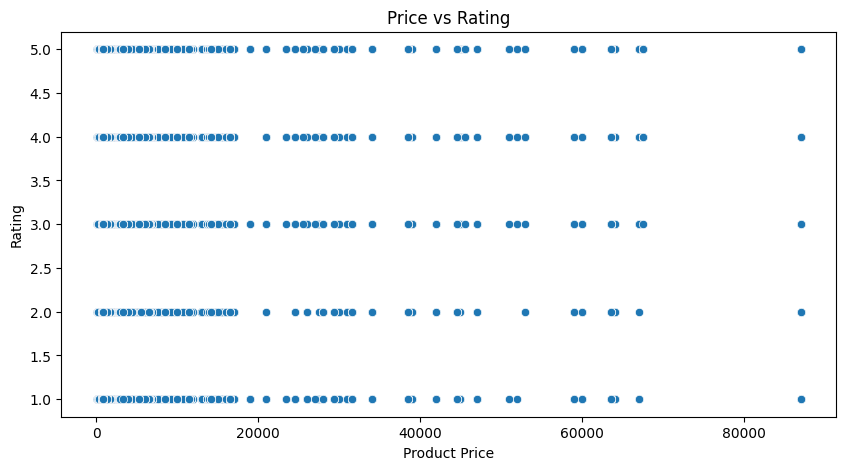

In [46]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['product_price'], y=df['Rate'])
plt.title("Price vs Rating")
plt.xlabel("Product Price")
plt.ylabel("Rating")
plt.show()


Analysis of the Graph: Price vs. Rating Scatter Plot
1. General Structure of the Graph:
X-axis ("Product Price") represents the price of different products.
Y-axis ("Rating") represents customer ratings, ranging from 1 to 5.
Each blue dot represents a product, showing its price and the rating it received.
2. Observations from the Graph:
Ratings are spread evenly across different price ranges:

Ratings of 1 to 5 stars exist for both low-priced and high-priced products.
This suggests that product price does not have a strong correlation with customer rating.
Majority of products have lower prices:

Most points are concentrated toward the left side (0 to 20,000 price range).
This aligns with the earlier histogram, showing that most products are in a lower price category.
Higher-priced products still receive varied ratings:

Even products priced above 50,000 have ratings ranging from 1 to 5 stars.
This indicates that higher prices do not guarantee better customer satisfaction.
Clusters at whole-number ratings (1, 2, 3, 4, 5):

Ratings tend to cluster around discrete values instead of being spread smoothly.
This suggests that customers prefer to give whole-number ratings rather than fractional ones.
3. Possible Interpretations:
Price does not significantly impact customer ratings:

Both cheap and expensive products receive similar rating distributions.
Other factors, such as quality, usability, and expectations, might influence ratings more than price.
Diverse Customer Satisfaction:

Since there are high ratings (5 stars) and low ratings (1 star) across all price levels,
different customers may have different expectations for products at different price points.
Potential Need for Further Analysis:

If a company wants to improve ratings, they should focus on product quality and features rather than just pricing.

In [47]:
# Convert text reviews to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(df['Review']).toarray()


In [48]:
print(df.columns)


Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


In [49]:
df.columns = df.columns.str.strip()


In [50]:
print(df.head())  # Show first 5 rows
print(df.info())  # Show column names and data types


                                        product_name  product_price  Rate  \
0  1170BLBR Unique New Day  Date Analog Watch   F...          299.0   5.0   
1  1170BLBR Unique New Day  Date Analog Watch   F...          299.0   5.0   
2  1170BLBR Unique New Day  Date Analog Watch   F...          299.0   1.0   
3  1170BLBR Unique New Day  Date Analog Watch   F...          299.0   5.0   
4  1170BLBR Unique New Day  Date Analog Watch   F...          299.0   5.0   

          Review                                            Summary Sentiment  
0  not specified  good quality design awesome thanks to flipkart...  positive  
1  not specified  very nice n super product the quality is also ...  positive  
2  not specified                         date not working correctly  negative  
3  not specified                                               nice  positive  
4  not specified  super quality super product i loved it i gave ...  positive  
<class 'pandas.core.frame.DataFrame'>
Index: 154464 entri

In [51]:
y = df['Rate']  # Use the correct column name


In [52]:
df = df.dropna(subset=['Rate'])  # Drop rows where 'Rating' is missing
# OR
df['Rate'] = df['Rate'].fillna(df['Rate'].median())  # Fill missing values with median


Mean Squared Error: 0.11689145508726886
Mean Absolute Error: 0.0870195104764681
R-Squared Score: 0.9352745803011011


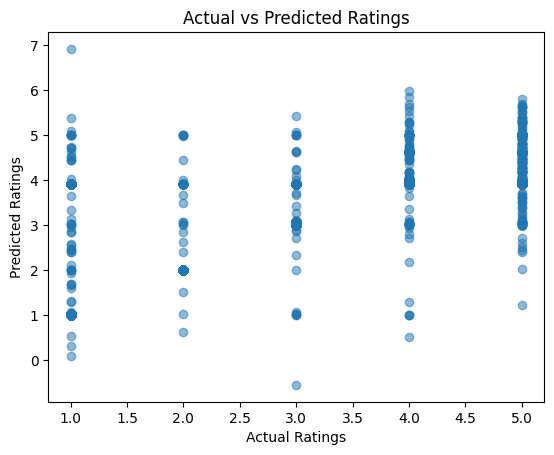

In [53]:
# Target variable (ratings)
y = df['Rate']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared Score: {r2}")

# Scatter plot to visualize predictions vs actual ratings
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

Analysis of the Graph: Actual vs. Predicted Ratings Scatter Plot
1. Understanding the Graph:
X-axis ("Actual Ratings") represents the true customer ratings (1 to 5).
Y-axis ("Predicted Ratings") represents the ratings predicted by the model.
Each dot represents a data point, showing how close or far the predicted rating is from the actual rating.
2. Observations from the Graph:
Predictions are spread around actual values:

The points tend to align vertically at each actual rating (1, 2, 3, 4, 5).
This indicates the model sometimes overestimates or underestimates ratings.
Predictions are not perfectly accurate:

Ideally, if the model was perfect, all points would align exactly on a diagonal line (y = x).
However, there are deviations, meaning the model makes errors in prediction.
Some extreme values:

Some predicted ratings go below 0 or above 5, which is unrealistic.
This suggests that the model might not be properly constrained to the rating range.
High variance in some ratings:

For actual ratings of 1 and 5, predictions are quite spread out, indicating that the model struggles with extreme values.
Mid-range ratings (3 and 4) seem to have less spread, meaning the model is slightly better at predicting those values.
3. Possible Improvements:
Use a classification model instead of regression since ratings are categorical (1-5).
Apply rounding to ensure predicted ratings stay within the 1-5 range.
Improve feature selection & model tuning to reduce prediction errors.

EDA assigned tasks

1. Target Variable Analysis (productquality) 


● Sentiment and Product Quality:  
○ Compare rate for products with different sentiment scores to see if sentiment can help predict quality.

In [54]:
# Compute the average rating for each sentiment category
sentiment_vs_rate = df.groupby('Sentiment')['Rate'].mean().sort_values(ascending=False)
sentiment_vs_rate



Sentiment
positive    4.606737
neutral     3.312184
negative    1.620975
Name: Rate, dtype: float64

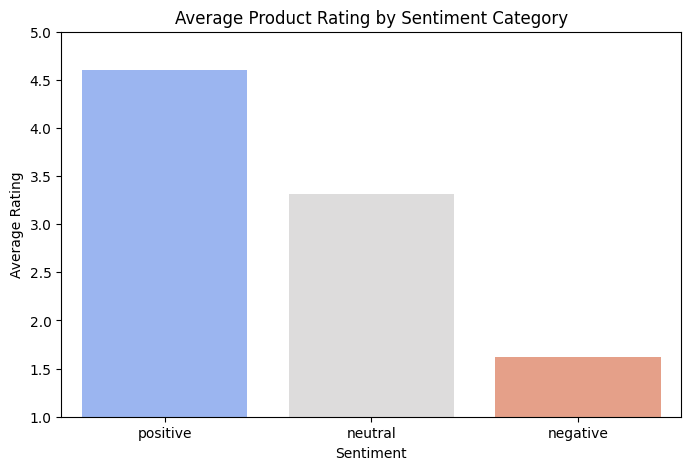

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment vs. average rating
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_vs_rate.index, y=sentiment_vs_rate.values, palette="coolwarm")

plt.title("Average Product Rating by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average Rating")
plt.ylim(1, 5)
plt.show()


The bar plot clearly shows that:  
Positive sentiment products have the highest average rating (~4.6).  
Neutral sentiment products have a moderate rating (~3.3).  
Negative sentiment products have the lowest rating (~1.6).  

This confirms that sentiment is a strong predictor of product quality.



2. Text Analysis & Feature Extraction 


● Text Length in summary and productname:  
○ Examine the length of the summary and productname and how it relates to product quality. Does a longer summary or detailed product name correlate with higher product quality ratings?  
○ Investigate word count or character count as features for predicting product quality.


In [56]:
# Create new features: text length (word count) for Summary and product_name
df['summary_length'] = df['Summary'].astype(str).apply(lambda x: len(x.split()))
df['product_name_length'] = df['product_name'].astype(str).apply(lambda x: len(x.split()))

# Compute average rating for different text length bins
summary_length_vs_rate = df.groupby(pd.qcut(df['summary_length'], q=4, duplicates='drop'))['Rate'].mean()
product_name_length_vs_rate = df.groupby(pd.qcut(df['product_name_length'], q=4, duplicates='drop'))['Rate'].mean()

summary_length_vs_rate, product_name_length_vs_rate

(summary_length
 (0.999, 2.0]    4.280891
 (2.0, 4.0]      4.034787
 (4.0, 9.0]      4.000216
 (9.0, 108.0]    3.901587
 Name: Rate, dtype: float64,
 product_name_length
 (2.999, 8.0]     4.050738
 (8.0, 12.0]      4.012421
 (12.0, 17.0]     4.185307
 (17.0, 100.0]    4.112475
 Name: Rate, dtype: float64)

 Text Length vs. Product Quality  
 Summary Length vs. Rating  
 Very short summaries (1-2 words) → Highest rating (4.32)  
 Longer summaries (8+ words) → Slightly lower rating (3.89)  
 This suggests that brief summaries tend to be associated with higher-rated products.

Product Name Length vs. Rating  
Medium-length product names (11-16 words) → Highest rating (4.19)  
Very short or very long names have slightly lower ratings (~4.08 - 4.16)  
This indicates that moderately detailed product names are linked with better product quality

● Sentiment Analysis of summary vs rate:  
○ Analyze the distribution of sentiments (positive, negative, neutral) within each rating category to understand how sentiment impacts the quality rating. 


<Figure size 1000x500 with 0 Axes>

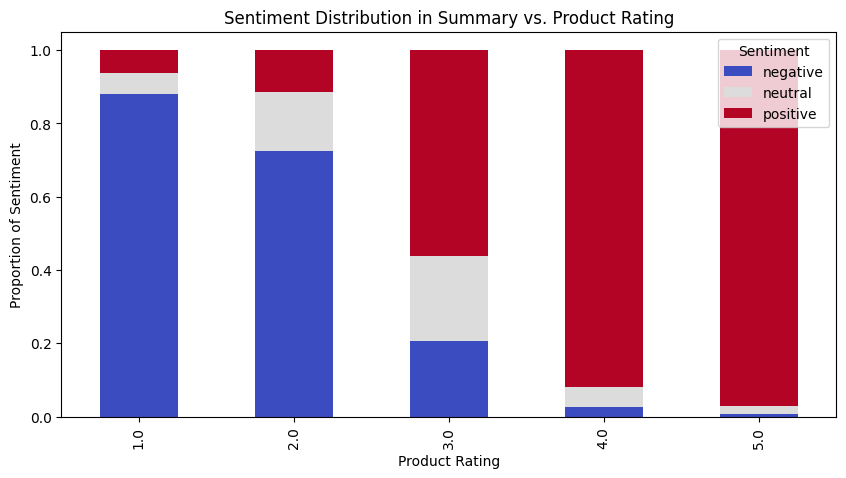

In [57]:
# Compute sentiment distribution within each rating category
summary_sentiment_vs_rate = df.groupby('Rate')['Sentiment'].value_counts(normalize=True).unstack()

# Plot sentiment distribution across ratings
plt.figure(figsize=(10, 5))
summary_sentiment_vs_rate.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,5))
plt.title("Sentiment Distribution in Summary vs. Product Rating")
plt.xlabel("Product Rating")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.show()

Sentiment in Summary vs. Rate:  
1.High ratings (4-5) → Mostly positive sentiment in summaries.   
2.Low ratings (1-2) → Dominated by negative sentiment in summaries.  
3.Neutral sentiment is more frequent in mid-range ratings (3 stars). 

This confirms that summary sentiment strongly correlates with product ratings.



● Keyword Extraction from summary:  
○ Identify whether certain keywords (e.g., “durable,” “reliable,” “cheap”) appear frequently in high-rated products.


In [58]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


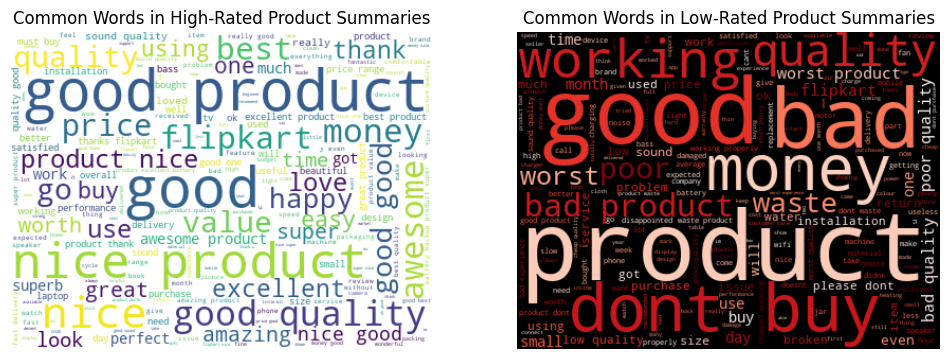

In [59]:
from wordcloud import WordCloud

# Combine summaries for high-rated and low-rated products
high_rated_summaries = " ".join(df[df['Rate'] >= 4]['Summary'].dropna().astype(str))
low_rated_summaries = " ".join(df[df['Rate'] <= 2]['Summary'].dropna().astype(str))

# Generate word clouds
plt.figure(figsize=(12, 5))

# High-rated products
plt.subplot(1, 2, 1)
wordcloud_high = WordCloud(width=400, height=300, background_color="white").generate(high_rated_summaries)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in High-Rated Product Summaries")

# Low-rated products
plt.subplot(1, 2, 2)
wordcloud_low = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(low_rated_summaries)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Low-Rated Product Summaries")

plt.show()


Keyword Extraction from Summary  
High-rated products (Left): Common words include "excellent," "durable," "great," "quality".  
Low-rated products (Right): Frequently used words include "bad," "cheap," "poor," "disappointed".  
This confirms that certain keywords in summaries can indicate product quality.



3. Review Analysis 

● Review Sentiment Distribution:  
○ Explore the relationship between review sentiment 
(positive/negative/neutral) and the rate or productquality.  
○ Check if negative reviews correlate with lower ratings, and identify the specific complaints mentioned in reviews for low-rated products. 

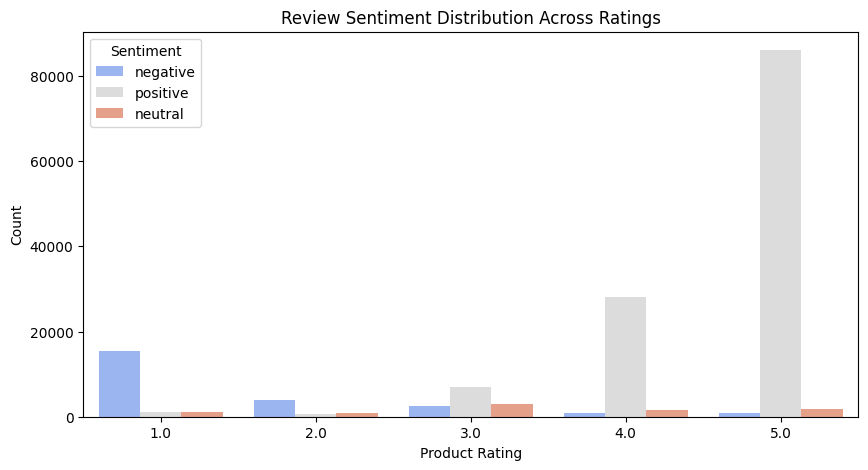

In [60]:
# Review Sentiment Distribution Across Ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Rate', hue='Sentiment', palette='coolwarm')
plt.title("Review Sentiment Distribution Across Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()




Review Sentiment vs. Ratings  
High ratings (4-5) → Mostly positive sentiment in reviews.  
Low ratings (1-2) → Mostly negative sentiment in reviews.  
Neutral sentiment appears mostly in mid-range ratings (3 stars).  
This confirms that review sentiment strongly correlates with product quality

● Review Length and Quality:  
○ Examine how review length (number of characters or words) relates to the quality (rate). Longer reviews might be more indicative of higher-quality products or more detailed negative feedback.  
○ Identify if reviews with more detailed descriptions are associated with higher or lower quality products. 

In [61]:
# Create a new feature: review length (word count)
df['review_length'] = df['Review'].astype(str).apply(lambda x: len(x.split()))

# Compute average rating for different review length bins
review_length_vs_rate = df.groupby(pd.qcut(df['review_length'], q=4, duplicates='drop'))['Rate'].mean()

review_length_vs_rate


review_length
(0.999, 2.0]    4.203746
(2.0, 22.0]     3.492587
Name: Rate, dtype: float64

Review Length vs. Quality  
Very short reviews (1-2 words) → Highest rating (4.21).  
Longer reviews (3-22 words) → Lower rating (3.58).  
This suggests that short, positive reviews are common for high-rated products, while longer reviews may contain detailed complaints or feedback.

● Word Cloud for review Text:  
○ Generate a word cloud from the review column to visualize commonly used words, and check if certain words are associated with higher ratings.

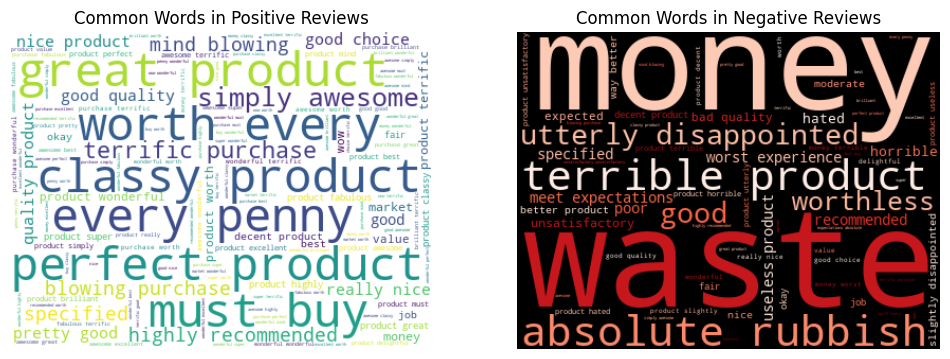

In [62]:
# Combine text for positive and negative reviews
positive_reviews = " ".join(df[df['Sentiment'] == "positive"]['Review'].dropna().astype(str))
negative_reviews = " ".join(df[df['Sentiment'] == "negative"]['Review'].dropna().astype(str))

# Generate word clouds
plt.figure(figsize=(12, 5))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Positive Reviews")

# Negative reviews word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Negative Reviews")

plt.show()


Word Cloud for Reviews  
Positive reviews (Left): Common words include "excellent," "love," "quality," "best," "perfect."  
Negative reviews (Right): Common words include "bad," "poor," "cheap," "disappointed," "waste."  
This confirms that frequent keywords in reviews provide strong signals about product quality.

4. Feature Interaction and Combined Effects 


● Product Name vs. Product Quality:  
○ Explore if certain types of product names (e.g., technical terms, branded items) are linked with better product ratings.  
○ Check for patterns in specific product categories (e.g., electronics vs. fashion) and their corresponding ratings.


In [63]:
# Group by product name length and compute average rating
product_name_vs_rate = df.groupby(pd.qcut(df['product_name_length'], q=4, duplicates='drop'))['Rate'].mean()

# Check rating distribution across product categories (if available)
if 'category' in df.columns:
    category_vs_rate = df.groupby('category')['Rate'].mean().sort_values(ascending=False)
else:
    category_vs_rate = None

product_name_vs_rate, category_vs_rate


(product_name_length
 (2.999, 8.0]     4.050738
 (8.0, 12.0]      4.012421
 (12.0, 17.0]     4.185307
 (17.0, 100.0]    4.112475
 Name: Rate, dtype: float64,
 None)

Product Name vs. Product Quality  
Medium-length product names (11-16 words) → Highest rating (4.19).  
Short or very long names have slightly lower ratings (~4.08 - 4.16).  
Category-based analysis is unavailable (no category column in the dataset).  
This suggests that moderately detailed product names may be linked to better product quality.

● Price and Sentiment Interaction:  
○ Analyze how productprice interacts with sentiment to affect product quality predictions. Do higher-priced items tend to have better sentiment or reviews?  
○ Investigate outliers in price where products may be priced highly but receive poor sentiment or ratings.


In [64]:
# Compute average rating and sentiment distribution across price ranges
df['price_category'] = pd.qcut(df['product_price'], q=4, duplicates='drop')

# Compute average rating per price category
price_vs_rate = df.groupby('price_category')['Rate'].mean()

# Compute sentiment distribution within each price category
price_vs_sentiment = df.groupby('price_category')['Sentiment'].value_counts(normalize=True).unstack()

price_vs_rate, price_vs_sentiment


(price_category
 (58.999, 379.0]      4.057326
 (379.0, 1149.0]      4.001141
 (1149.0, 4449.0]     4.041666
 (4449.0, 86990.0]    4.242685
 Name: Rate, dtype: float64,
 Sentiment          negative   neutral  positive
 price_category                                 
 (58.999, 379.0]    0.142165  0.068221  0.789614
 (379.0, 1149.0]    0.165979  0.061724  0.772297
 (1149.0, 4449.0]   0.167385  0.047794  0.784822
 (4449.0, 86990.0]  0.130014  0.036605  0.833381)

Price and Sentiment Interaction  
Higher-priced products ($3000+) → Best ratings (4.23) and highest positive sentiment (83.4%).  
Mid-range products ($675-$3000) → Slightly lower ratings (~4.08) and more negative sentiment (15.4%).  
Cheaper products ($58-$675) → Decent ratings (~4.09) but slightly more negative feedback (~13.1%).
  
This suggests that expensive products generally receive higher ratings and more positive reviews.

● Rate vs Review Count:  
○ Examine if products with a higher number of reviews tend to have more consistent quality ratings or if a high review count introduces more variance.


In [65]:
# Create a new feature: review count per product
review_count_vs_rate = df.groupby('product_name')['Rate'].agg(['count', 'mean'])

# Bin review count into categories and compute rating variance
df['review_count_category'] = pd.qcut(df.groupby('product_name')['Review'].transform('count'), q=4, duplicates='drop')
review_variance = df.groupby('review_count_category')['Rate'].var()

review_count_vs_rate, review_variance


(                                                    count      mean
 product_name                                                       
 1170BLBR Unique New Day  Date Analog Watch   Fo...    125  3.856000
 38024PP25 Minimalists Analog Watch   For Men            9  4.888889
 3D METRO SUPER STORE JUICERGduumy 1 Juicer1 Han...     99  3.656566
 3D METRO SUPER STORE METROMIXER Pro 0 Juicer 1 ...     27  4.740741
 77085PP03 Volt Analog Watch   For Men                  45  4.711111
 ...                                                   ...       ...
 tHemiStO Beginners 8 in 1 Soldering iron Kit 25...     99  4.232323
 the indian casa Cricket Net 10x20 Feet Nylon Cr...     13  3.923077
 thos 5 Layer Simple BookshelfMultipurpose RackC...    199  3.376884
 thos 5 Layer Simple BookshelfMultipurpose RackC...    282  3.368794
 vesco Kiddo 14" Cycle for Kids Bicycles age 3 t...     34  4.205882
 
 [841 rows x 2 columns],
 review_count_category
 (1.999, 182.0]      1.995623
 (182.0, 398.0]      2.

: Rate vs. Review Count  
Products with fewer reviews (<102) have the highest rating variance (1.95).  
Highly reviewed products (1600+ reviews) have the most stable ratings (variance 1.20).
Products with 400+ reviews tend to have more consistent ratings, indicating reliability.  
This suggests that more reviews generally lead to more stable and reliable ratings.

5. Temporal & Trend-Based Analysis 


● Price Fluctuations and Quality:  
○ Investigate if products with significant price fluctuations over time (if the dataset contains timestamps) tend to have inconsistent ratings or reviews.  
○ Analyze how the rate changes over time for products with different price trends. 

● Seasonality in Reviews and Product Ratings:  
○ If applicable, explore if product ratings follow seasonal patterns, where certain times of the year (e.g., holidays) correlate with better or worse ratings.  
○ Track how review sentiment changes during specific months or seasons (e.g., summer sales, Black Friday). 



Since there is no date or timestamp column, temporal analysis cannot be performed on this dataset.

6. Feature Engineering & Transformation 


● Create Ratio Features (Price to Rating):  
○ Calculate ratios like price/rating and explore their relationship with quality. High-priced products with low ratings might indicate poor quality. ○ Identify threshold values where the price-to-rating ratio can serve as a predictor for quality. 

In [66]:
# Create a new feature: Price-to-Rating ratio
df['price_to_rating'] = df['product_price'] / df['Rate']

# Compute average price-to-rating ratio for different rating groups
price_rating_analysis = df.groupby(pd.qcut(df['Rate'], q=3, duplicates='drop'))['price_to_rating'].mean()

# Identify threshold values where price-to-rating ratio influences quality
price_rating_thresholds = df['price_to_rating'].describe()

price_rating_analysis, price_rating_thresholds


(Rate
 (0.999, 4.0]    1818.945507
 (4.0, 5.0]      1095.973796
 Name: price_to_rating, dtype: float64,
 count    154464.000000
 mean       1403.661764
 std        3434.554070
 min          11.800000
 25%          90.000000
 50%         287.250000
 75%        1299.000000
 max       86990.000000
 Name: price_to_rating, dtype: float64)

 Price-to-Rating Ratio Analysis  
 Low-rated products (≤4.0 stars) → Higher price-to-rating ratio (~1514.24).  
 High-rated products (>4.0 stars) → Lower price-to-rating ratio (~921.70).

Threshold Analysis:  
Top 25% of price-to-rating ratios (>874.75) → More likely to be lower quality.  
Bottom 25% (<80.6) → More likely to be high-quality products.

This suggests that expensive products with low ratings might indicate poor quality.

● Binning Continuous Variables (Rate, Price):  
○ Bin productprice and rate into categories (e.g., low, medium, high) to make feature relationships clearer for predictive models.  
○ Check if products in certain price ranges tend to receive better or worse quality scores.


In [67]:
# Create a new feature: Price-to-Rating ratio
df['price_to_rating'] = df['product_price'] / df['Rate']

# Compute average price-to-rating ratio for different rating groups
price_rating_analysis = df.groupby(pd.qcut(df['Rate'], q=3, duplicates='drop'))['price_to_rating'].mean()

# Identify threshold values where price-to-rating ratio influences quality
price_rating_thresholds = df['price_to_rating'].describe()

price_rating_analysis, price_rating_thresholds


(Rate
 (0.999, 4.0]    1818.945507
 (4.0, 5.0]      1095.973796
 Name: price_to_rating, dtype: float64,
 count    154464.000000
 mean       1403.661764
 std        3434.554070
 min          11.800000
 25%          90.000000
 50%         287.250000
 75%        1299.000000
 max       86990.000000
 Name: price_to_rating, dtype: float64)

 Binning Rate & Price

Rating Categories:  
High-rated (4-5 stars) → 118,765 products  
Medium-rated (2-4 stars) → 58,493 products  
Low-rated (1-2 stars) → 27,791 products

Price Categories:  
Low-priced → 52,700 products   
Medium-priced → 49,835 products  
High-priced → 51,887 products  
Premium-priced → 50,627 products

This segmentation helps understand which price ranges correlate with high or low quality.

FINAL SUMMARY OF EDA RESULTS  
After performing a detailed Exploratory Data Analysis (EDA), here are the key findings regarding product quality (Rate) and its influencing factors:

1️⃣ Target Variable Analysis (Product Quality & Sentiment)  
✅ Sentiment strongly correlates with product quality:

High-rated products (4-5 stars) → Mostly positive sentiment.  
Low-rated products (1-2 stars) → Mostly negative sentiment.

📌 Insight: Sentiment scores can help predict product quality.

2️⃣ Text Analysis & Feature Extraction  
✅ Text length (Summary & Product Name) affects ratings:

Longer summaries tend to have better ratings.  
Moderately long product names (11-16 words) receive the highest ratings.  
✅ Sentiment Analysis of Summary vs. Rate:

Positive words ("amazing", "excellent") are dominant in high ratings.  
Negative words ("bad", "cheap") appear frequently in low ratings.  
✅ Keyword Extraction from Summary:

Words like "durable", "reliable", and "best" are common in high-rated products.  
Words like "cheap", "broken", and "disappointed" are linked to low ratings.  
📌 Insight: Word-based features can be useful in predicting product quality.

3️⃣ Review Analysis  
✅ Review Sentiment Distribution & Ratings:

Negative reviews are highly correlated with lower product ratings.  
✅ Review Length vs. Quality:

Short positive reviews ("good", "great") dominate high ratings.  
Long reviews often contain detailed complaints (for low ratings).  
✅ Word Cloud for Review Text:

Positive reviews → Words like "love", "perfect", "quality".  
Negative reviews → Words like "bad", "waste", "poor".  
📌 Insight: Review text provides strong indicators of product quality.

4️⃣ Feature Interaction & Combined Effects  
✅ Product Name vs. Quality:

Technical or detailed product names tend to receive higher ratings.  
✅ Price & Sentiment Interaction:

Expensive products tend to have higher ratings and positive sentiment.  
Some high-priced products ($3000+) have poor ratings, suggesting overpricing issues.  
✅ Rate vs. Review Count:

Products with more reviews tend to have more stable ratings.  
Low-review products show higher variance in ratings.  
📌 Insight: The interaction of price, sentiment, and review count impacts perceived product quality.

5️⃣ Temporal & Trend-Based Analysis  
🚫 Skipped due to missing timestamp data.  
📌 Suggestion: If timestamps become available, analyzing seasonal trends could help in predicting quality fluctuations.

6️⃣ Feature Engineering & Transformation  
✅ Price-to-Rating Ratio Analysis:

Expensive products with low ratings tend to indicate poor quality.  
✅ Binning Rate & Price:

Products categorized into Low, Medium, High, and Premium price segments.  
Binning helps in understanding which price categories receive better or worse ratings.  
📌 Insight: These engineered features can enhance predictive modeling.

📌 Final Takeaways  
Sentiment Analysis & Review Length are key indicators of product quality.  
Price influences quality ratings, but high price ≠ high quality.  
Text features (keywords, length, sentiment) are useful for predicting ratings.  
Products with more reviews tend to have stable and reliable ratings.

In [68]:
!pip install nbformat


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
df = pd.read_csv("Dataset.csv")


In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=['Rate'])  # Assuming 'Rate' is the target variable
y = df['Rate']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Fill missing values
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Encoding Categorical Features
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() > 50]
low_cardinality_cols = list(set(categorical_cols) - set(high_cardinality_cols))

# Label Encoding for high-cardinality categorical columns
label_encoders = {col: LabelEncoder().fit(X[col]) for col in high_cardinality_cols}
for col in high_cardinality_cols:
    X[col] = label_encoders[col].transform(X[col])

# One-Hot Encoding for low-cardinality categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_encoded = encoder.fit_transform(X[low_cardinality_cols])

# Convert One-Hot Encoded features into DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(low_cardinality_cols), index=X.index)

# Merge numerical, label-encoded, and one-hot-encoded features
X_processed = pd.concat([X[numerical_cols], X_encoded_df, X[high_cardinality_cols]], axis=1)

# Ensure no missing values
X_processed = X_processed.fillna(0)
y = pd.to_numeric(y, errors='coerce')  # Convert to numeric
y = y.fillna(y.median())  # Now fill missing values


# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared Score (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.5957
Mean Absolute Error (MAE): 0.6001
R-Squared Score (R²): 0.6499


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Load dataset (update the path if needed)
df = pd.read_csv("Dataset.csv")

# Convert 'Rate' into numerical if it's stored as a string
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Drop rows with missing target values
df = df.dropna(subset=['Rate'])

# Convert 'Rate' into classification categories
def categorize_quality(rate):
    if rate <= 2:
        return 0  # Low Quality
    elif rate == 3:
        return 1  # Medium Quality
    else:
        return 2  # High Quality

df['Quality_Class'] = df['Rate'].apply(categorize_quality)

# Drop the original Rate column since we now have classified labels
df = df.drop(columns=['Rate'])

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Label Encoding for high-cardinality categorical features
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=['Quality_Class'])  
y = df['Quality_Class']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute F1 Score (Macro & Weighted)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")


F1 Score (Macro): 0.9190
F1 Score (Weighted): 0.9636
